### Mansi Saxena
### TASK 4 : Global Terrorism Analysis
#### The Sparks Foundation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("globalterrorismdb_0718dist.csv",encoding="ISO 8859-1")

C:\Users\Mansi Saxena\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.sample(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
165147,201607240050,2016,7,23,NaN,0,NaN,142,Netherlands,8,...,NaN,"""More arson attacks on Dutch Turkish organisat...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
109113,201207030018,2012,7,3,NaN,0,NaN,153,Pakistan,6,...,NaN,"""Militants kill top political leader in Pak,"" ...","""Pakistan: ANP leader shot dead in Tank,"" Righ...","""LENGTH: 103 words,"" Right Vision News, Ju...",START Primary Collection,-9,-9,0,-9,NaN
56482,199406040001,1994,6,4,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN
120040,201308080013,2013,8,8,NaN,0,NaN,113,Libya,10,...,NaN,"""Benghazi remains vulnerable on Eid al-Fitr,"" ...","""Eid marked in Benghazi with attack on shops: ...",NaN,START Primary Collection,-9,-9,0,-9,NaN
16792,198208110007,1982,8,11,NaN,0,NaN,217,United States,1,...,NaN,"""Palestinian terrorist eludes U.S. in Iraq: Ma...","""Rashid Trial Postponed For 8 days,"" Associate...","""Blast Kills Passenger On 747 Flight To Honolu...",UMD Miscellaneous,1,1,1,1,NaN


In [4]:
list(df.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [5]:
df=df[['iyear','imonth','iday','country_txt','region_txt','city',
       'attacktype1_txt','targtype1_txt','weaptype1_txt','nkill','nwound','gname']]

In [6]:
df.head()

,iyear,imonth,iday,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound,gname
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Unknown,1.0,0.0,MANO-D
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0,23rd of September Communist League
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0,0.0,Unknown
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN,Unknown
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN,Unknown


In [7]:
df.isnull().sum()

iyear                  0
imonth                 0
iday                   0
country_txt            0
region_txt             0
city                 434
attacktype1_txt        0
targtype1_txt          0
weaptype1_txt          0
nkill              10313
nwound             16311
gname                  0
dtype: int64

### Which country is most affected ?

Text(0.5, 0, 'no. of attacks')

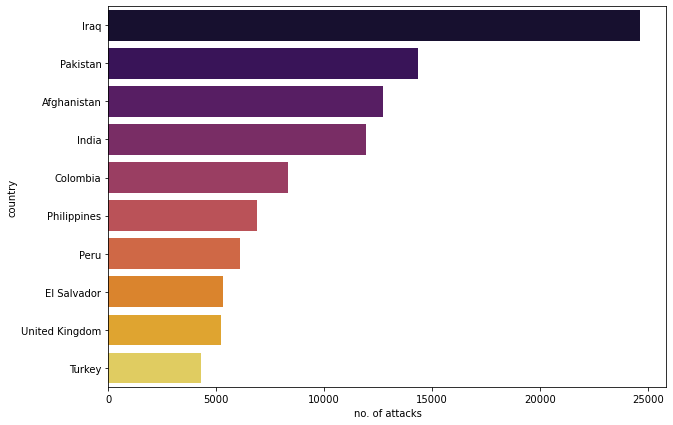

In [8]:
df_country=df['country_txt'].value_counts()[:10]
plt.figure(figsize=(10,7))
sns.barplot(x=df_country,y=df_country.index,palette='inferno')
plt.ylabel('country')
plt.xlabel('no. of attacks')

### Which city is most affected ?

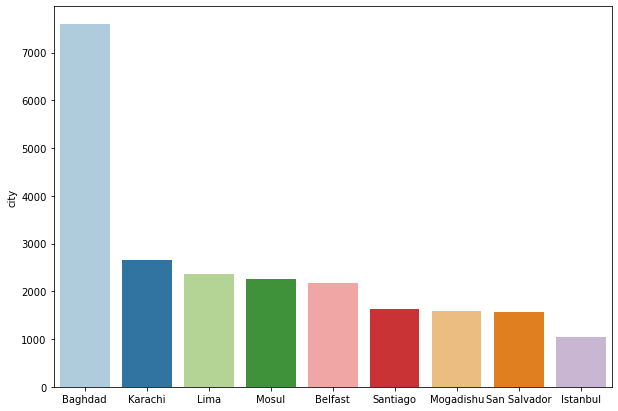

In [9]:
df_city=df['city'].value_counts()[1:10]
plt.figure(figsize=(10,7))
sns.barplot(x=df_city.index,y=df_city,palette='Paired')

### Which year has most no. of attacks ?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

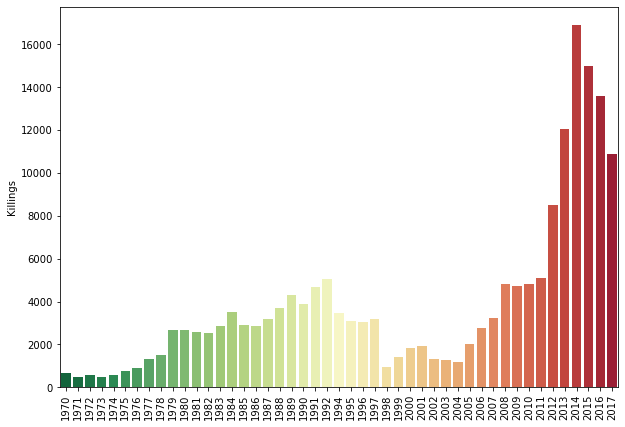

In [10]:
df_year=df['iyear'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=df_year.index,y=df_year,palette='RdYlGn_r')
plt.ylabel('Killings')
plt.xticks(rotation=90)

### Favourite attacking method

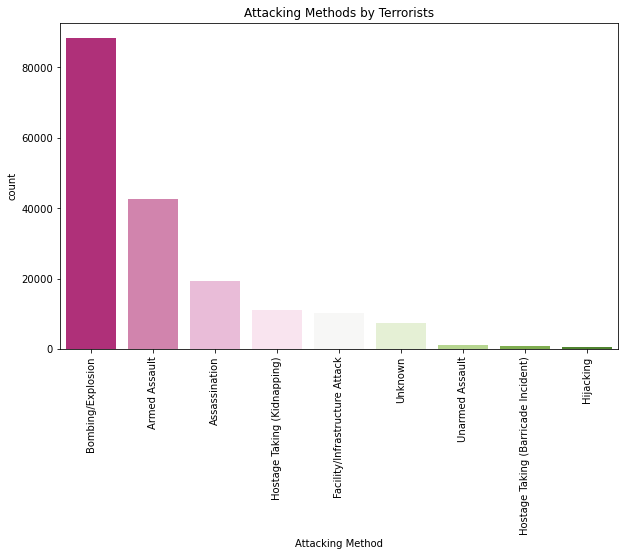

In [11]:
plt.subplots(figsize=(10,6))
sns.countplot('attacktype1_txt',data=df,palette="PiYG",order=df['attacktype1_txt'].value_counts().index)
plt.xlabel("Attacking Method")
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

### Favourite Targets

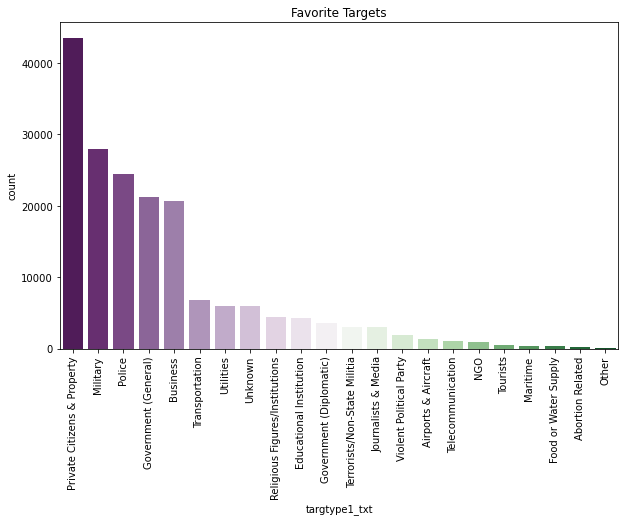

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(df['targtype1_txt'],palette="PRGn",order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Targets')
plt.show()

### Terror activities over different regions

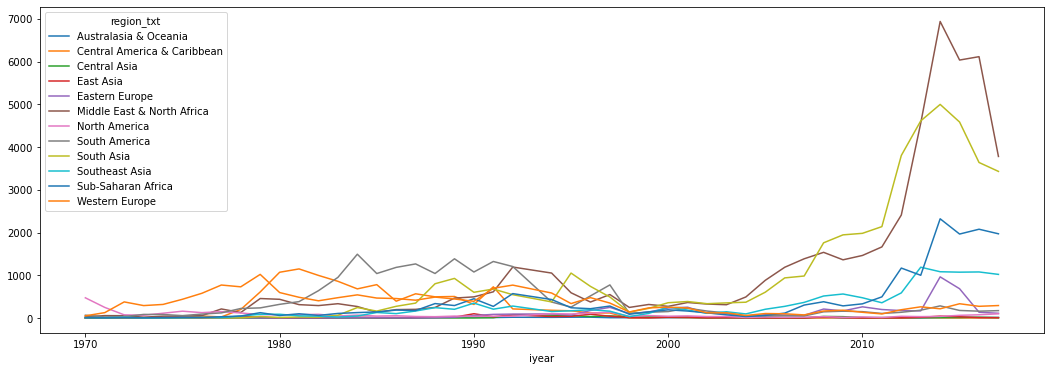

In [13]:
df_region=pd.crosstab(df.iyear,df.region_txt)
df_region.plot()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### Most used weapons

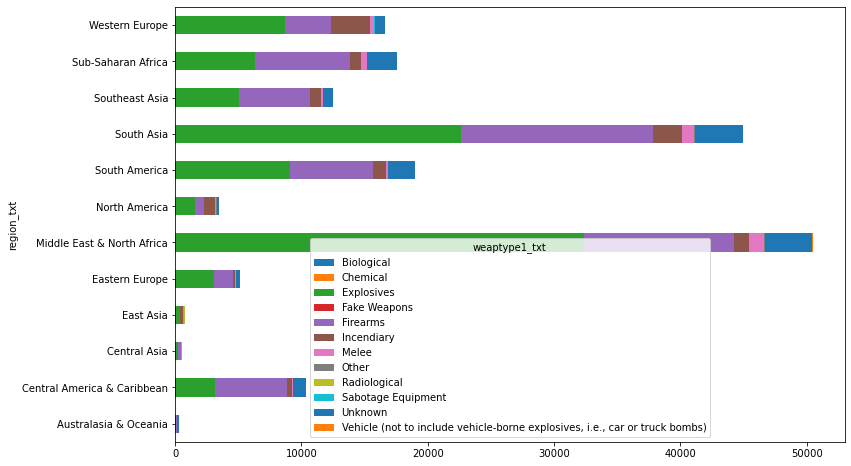

In [14]:
df_weapon=pd.crosstab(df.region_txt,df.weaptype1_txt)
df_weapon.plot.barh(stacked=True)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

### Attacks vs Kills

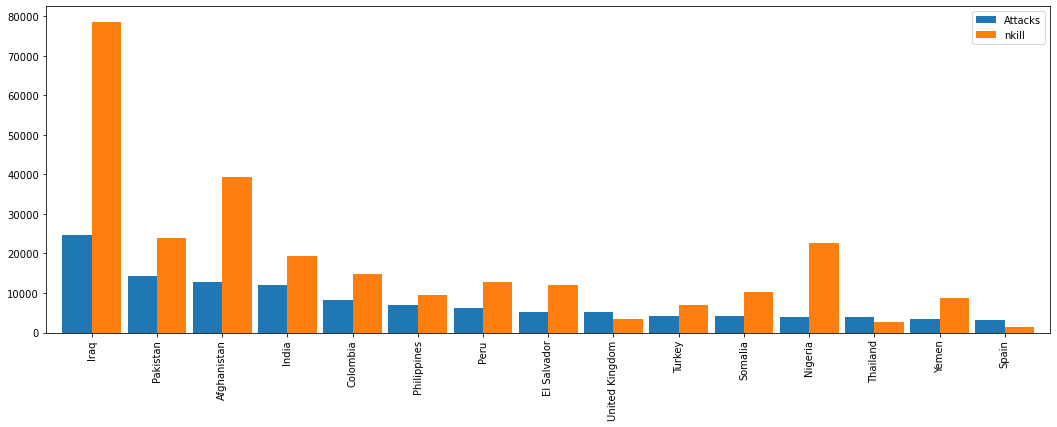

In [15]:
coun_terror=df['country_txt'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('country_txt')['nkill'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

### Top 10 terror groups worldwide

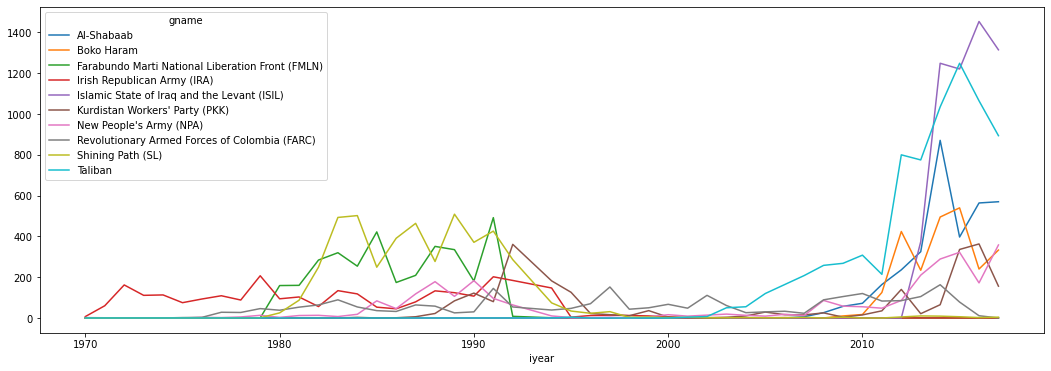

In [16]:
top_groups10=df[df['gname'].isin(df['gname'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.iyear,top_groups10.gname).plot()
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()


In [17]:
print('Max number of kills in an attack are',df['nkill'].max(),'in',df.loc[df['nkill'].idxmax()].country_txt,'in',df.loc[df['nkill'].idxmax()].iyear)

Max number of kills in an attack are 1570.0 in Iraq in 2014


In [18]:
print('Most destructive group in India is', df[df['country_txt']=='India'].gname.value_counts().index[1])

Most destructive group in India is Communist Party of India - Maoist (CPI-Maoist)
